#### Evaluation Project - 6

# Loan Application Status Prediction

#### Problem Statement:                                                                                                       
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.                                                             

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [105]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [106]:
# loading dataset and checking shape and head of the data
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
print("rows:",df.shape[0],"    columns:",df.shape[1])
df.head()

rows: 614     columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [107]:
# checking duplicated values
df.duplicated().sum()

0

In [108]:
# checking ' ','NA','-','?' in dataset
df.isin([' ','NA','-','?']).sum().any()

False

In [109]:
# checking null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* There is no duplicate row in dataset
- ( ' ','NA','-','?' ) these values are not present in dataset
- But, there are null values in dataset in 7 columns 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

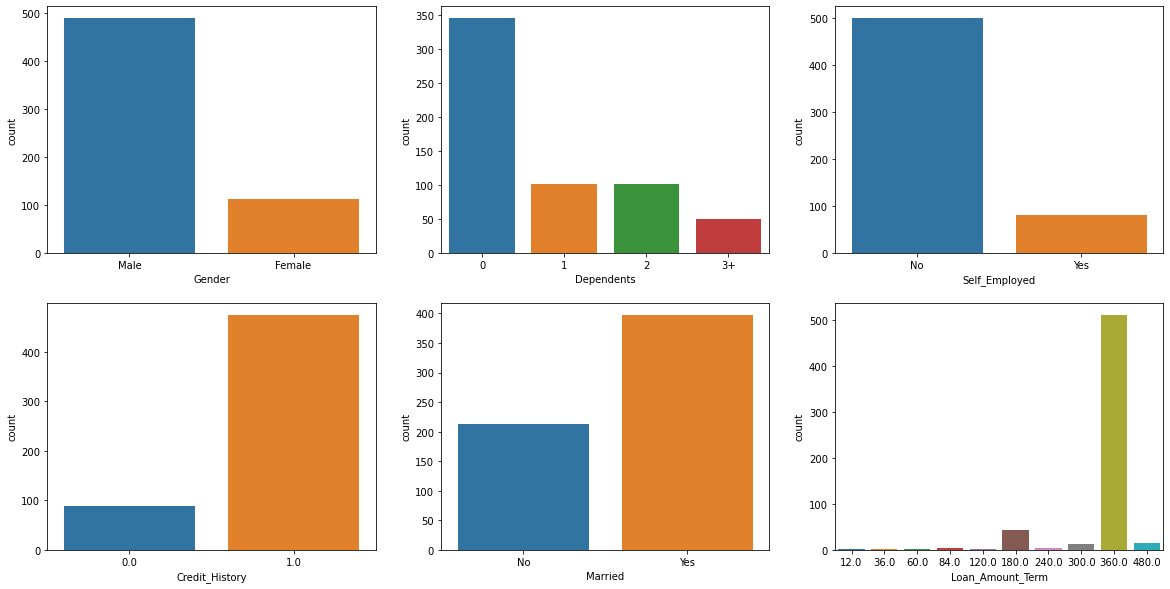

In [110]:
# let's analyse the columns to fill null values
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(data=df,x='Gender')
plt.subplot(2,3,2)
sns.countplot(data=df,x='Dependents')
plt.subplot(2,3,3)
sns.countplot(data=df,x='Self_Employed')
plt.subplot(2,3,4)
sns.countplot(data=df,x='Credit_History')
plt.subplot(2,3,5)
sns.countplot(data=df,x='Married')
plt.subplot(2,3,6)
sns.countplot(data=df,x='Loan_Amount_Term')

- i'll go with mode to fill null values as data in above columns is categorical
- and i'll drop row containing null values in column married as it has only 3 null values

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

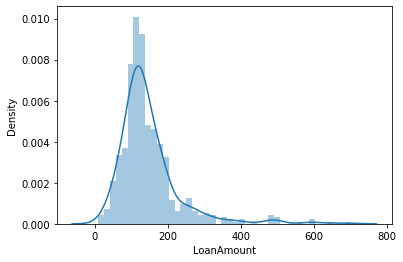

In [111]:
# checking distribution in Credit_History
sns.distplot(df['LoanAmount'])

- here data is skewed so i'll use median method to fill null values so may be it will reduce some or may be littlt skewness

In [112]:
# fillin null values
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# fill null values of loan amount with median
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [113]:
# drop 3 rows from married column
df=df.dropna()
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [114]:
df.shape

(611, 13)

- all null values are filled or removed 
- 3 rows are dropped

In [115]:
# cheking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            611 non-null    object 
 1   Gender             611 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         611 non-null    object 
 4   Education          611 non-null    object 
 5   Self_Employed      611 non-null    object 
 6   ApplicantIncome    611 non-null    int64  
 7   CoapplicantIncome  611 non-null    float64
 8   LoanAmount         611 non-null    float64
 9   Loan_Amount_Term   611 non-null    float64
 10  Credit_History     611 non-null    float64
 11  Property_Area      611 non-null    object 
 12  Loan_Status        611 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 66.8+ KB


In [116]:
# checking stats of data numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,611.000000,611.000000,611.000000,611.000000,611.000000
mean,5399.513912,1627.972046,145.738134,342.324059,0.854337
std,6120.764249,2931.747971,84.307304,64.208419,0.353057
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1213.000000,128.000000,360.000000,1.000000
75%,5790.000000,2304.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


- In applicantIncome column deviation is more than mean but difference in quantile range looks neary equal. So there may be no outliers in this column
- In coapplivantIncome column deviation is more than mean and max value as compared to quantile range goes much higher so there may be outliers present in this column
- There is no problem with deviation in LoanAmount columns but i can easily say that there are outliers by looking at max value
- Credit_History is categorical column so no observation from this matrix
- Loan_Amount_Term:	quantile range is same in this column max and min value is different, so there might be outliers 

In [117]:
# checking stats of object column
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,611,611,611,611,611,611,611,611
unique,611,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,500,398,357,477,529,231,419


- Loan_id has all unique value and this column is of no use to it is good to drop this column
- it looks data is imbalanced in Gender as we can see the frequency of male is 500 same problem is with Loan_status, self_employed and education

In [118]:
# using label encoding to convert object data into numbers
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = lab.fit_transform(df[i])

<AxesSubplot:>

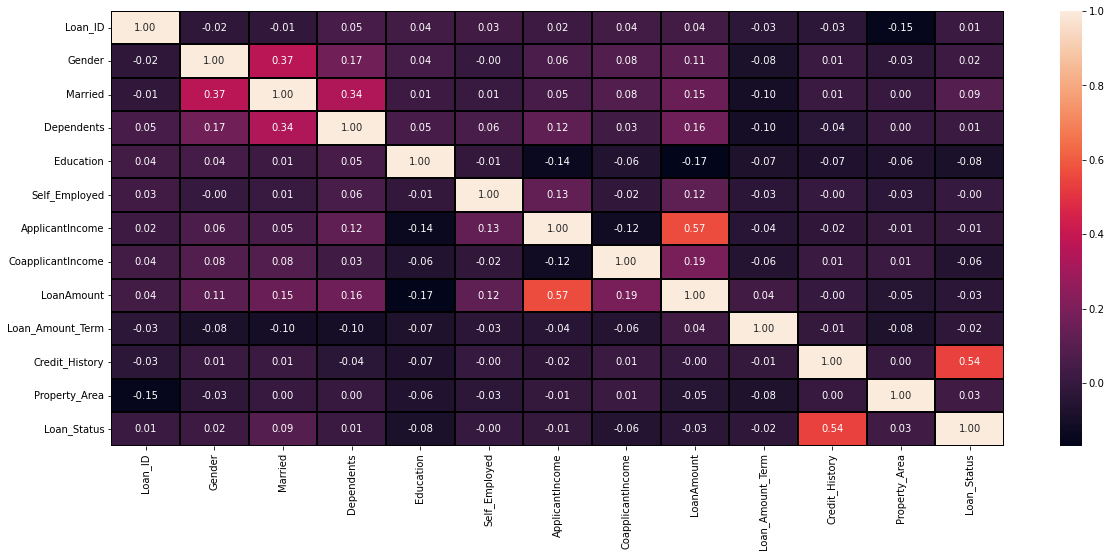

In [119]:
# checking correlation 
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

- Loan_id is not correlated to label so, i'll drop this column
- Gender is not that much correlated to label so i'll not consider that column too
- i'll consider married column to be to feature as it may effect loan_status at some extent
- dependents don't correlated to label and it is correlated with married so i'll drop this column
- Education is correlated to label 
- selfemployed and applicatincame are not correlated to label
- capitalIncome is correlated with label 
- Loan amount is also correlated with label
- credit history is highly correlated with target column
- i'll consider property_area too as feature

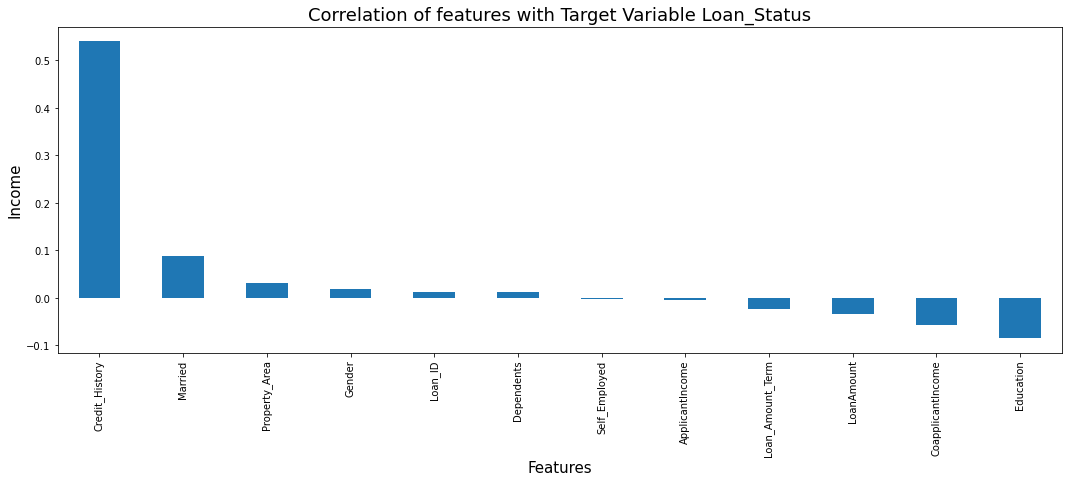

In [120]:
# cheking correlation 
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

In [121]:
# removing unnecessary columns
df = df.drop(columns=['Loan_ID', 'Gender','Dependents','Self_Employed'])

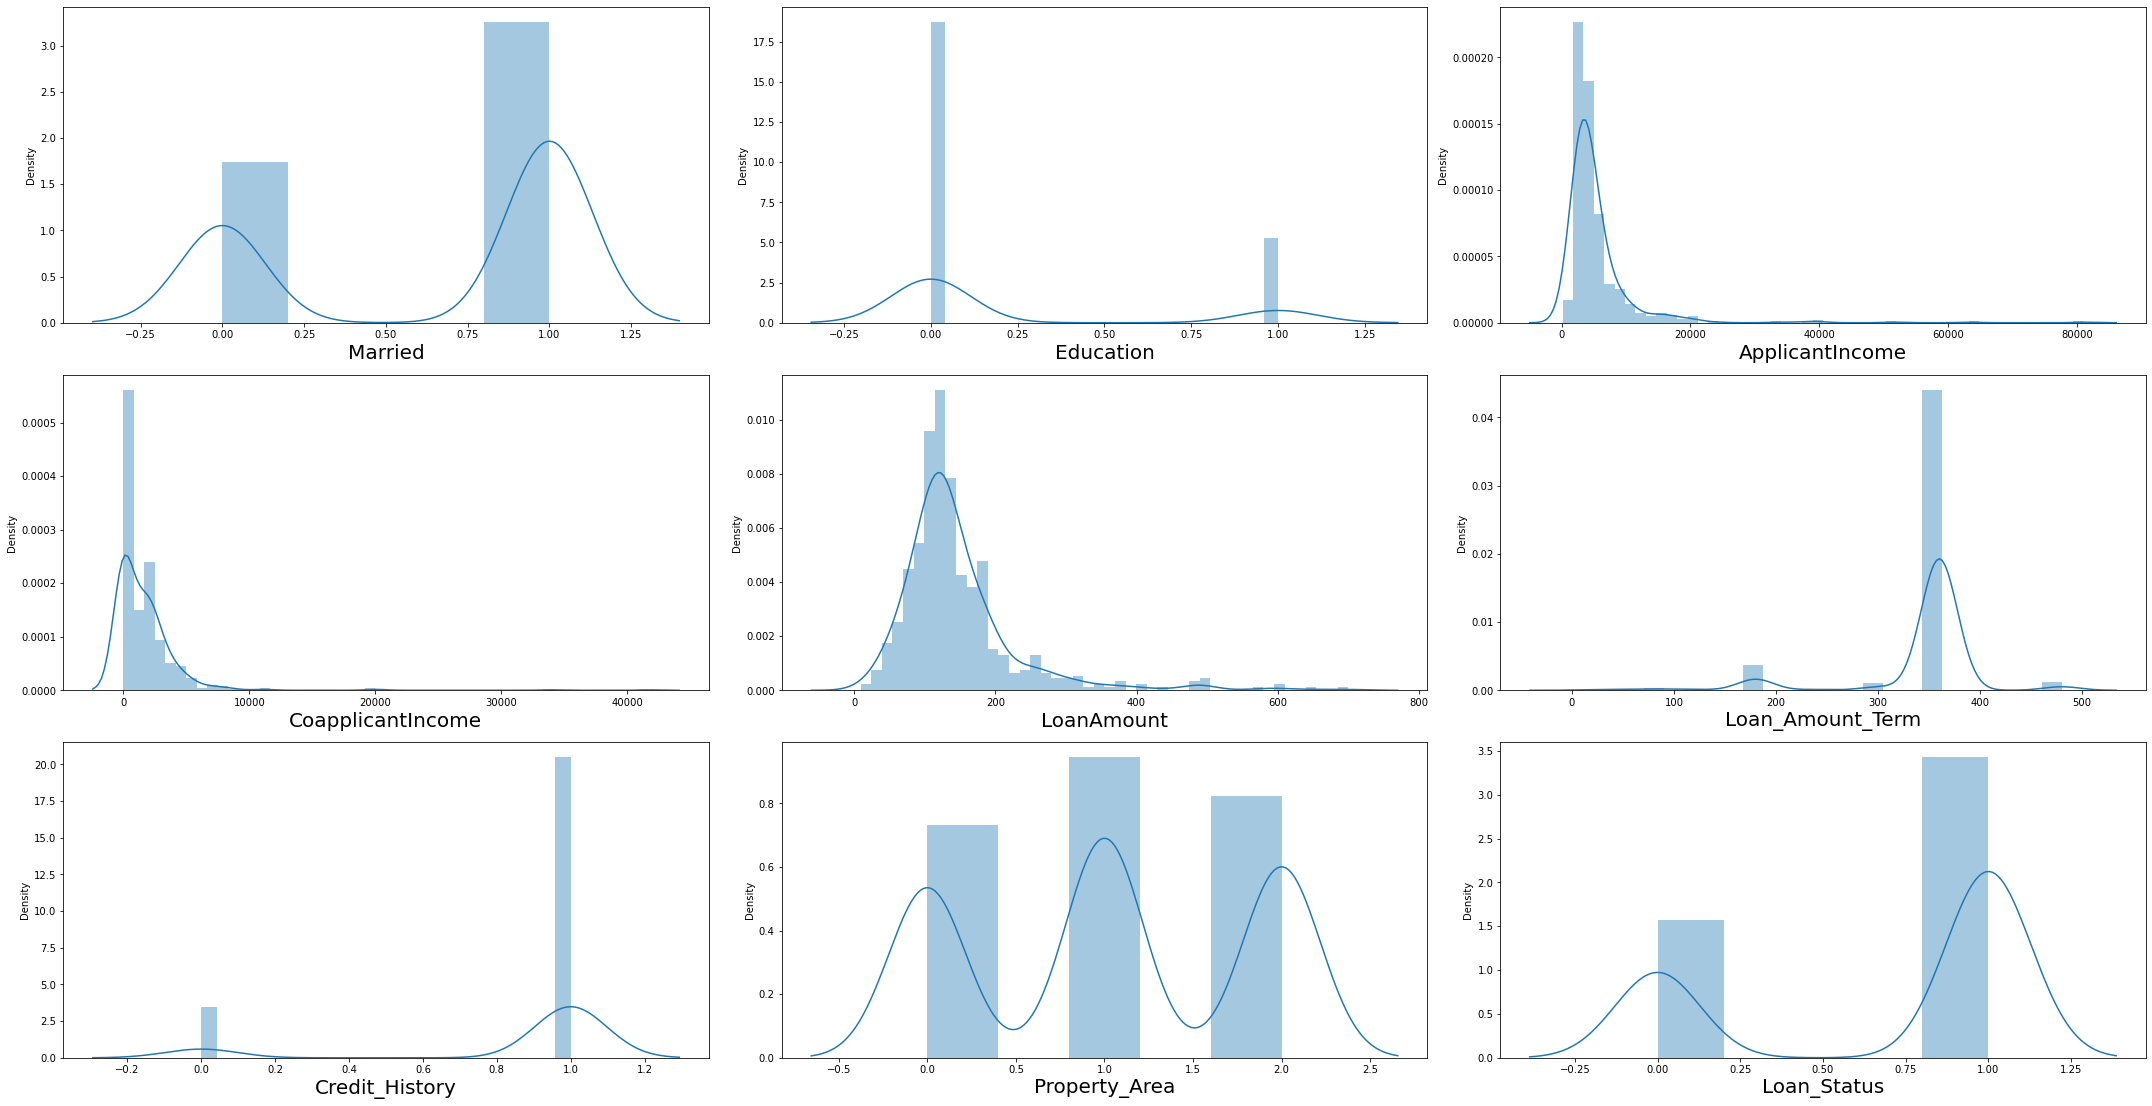

In [122]:
# checking outliers
# let's check the distribution of data
plt.figure(figsize = (30,20))
plotnumber = 1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

- data is skewed in 'ApplicantIncome', 'CoapplicantIncome','LoanAmount'
- other columns as categorical

In [123]:
# removing skewness using 'yeo-johnson'
from sklearn.preprocessing import PowerTransformer
skewed = [ 'ApplicantIncome', 'CoapplicantIncome','LoanAmount']
scaler = PowerTransformer(method='yeo-johnson')
df[skewed] = scaler.fit_transform(df[skewed].values)

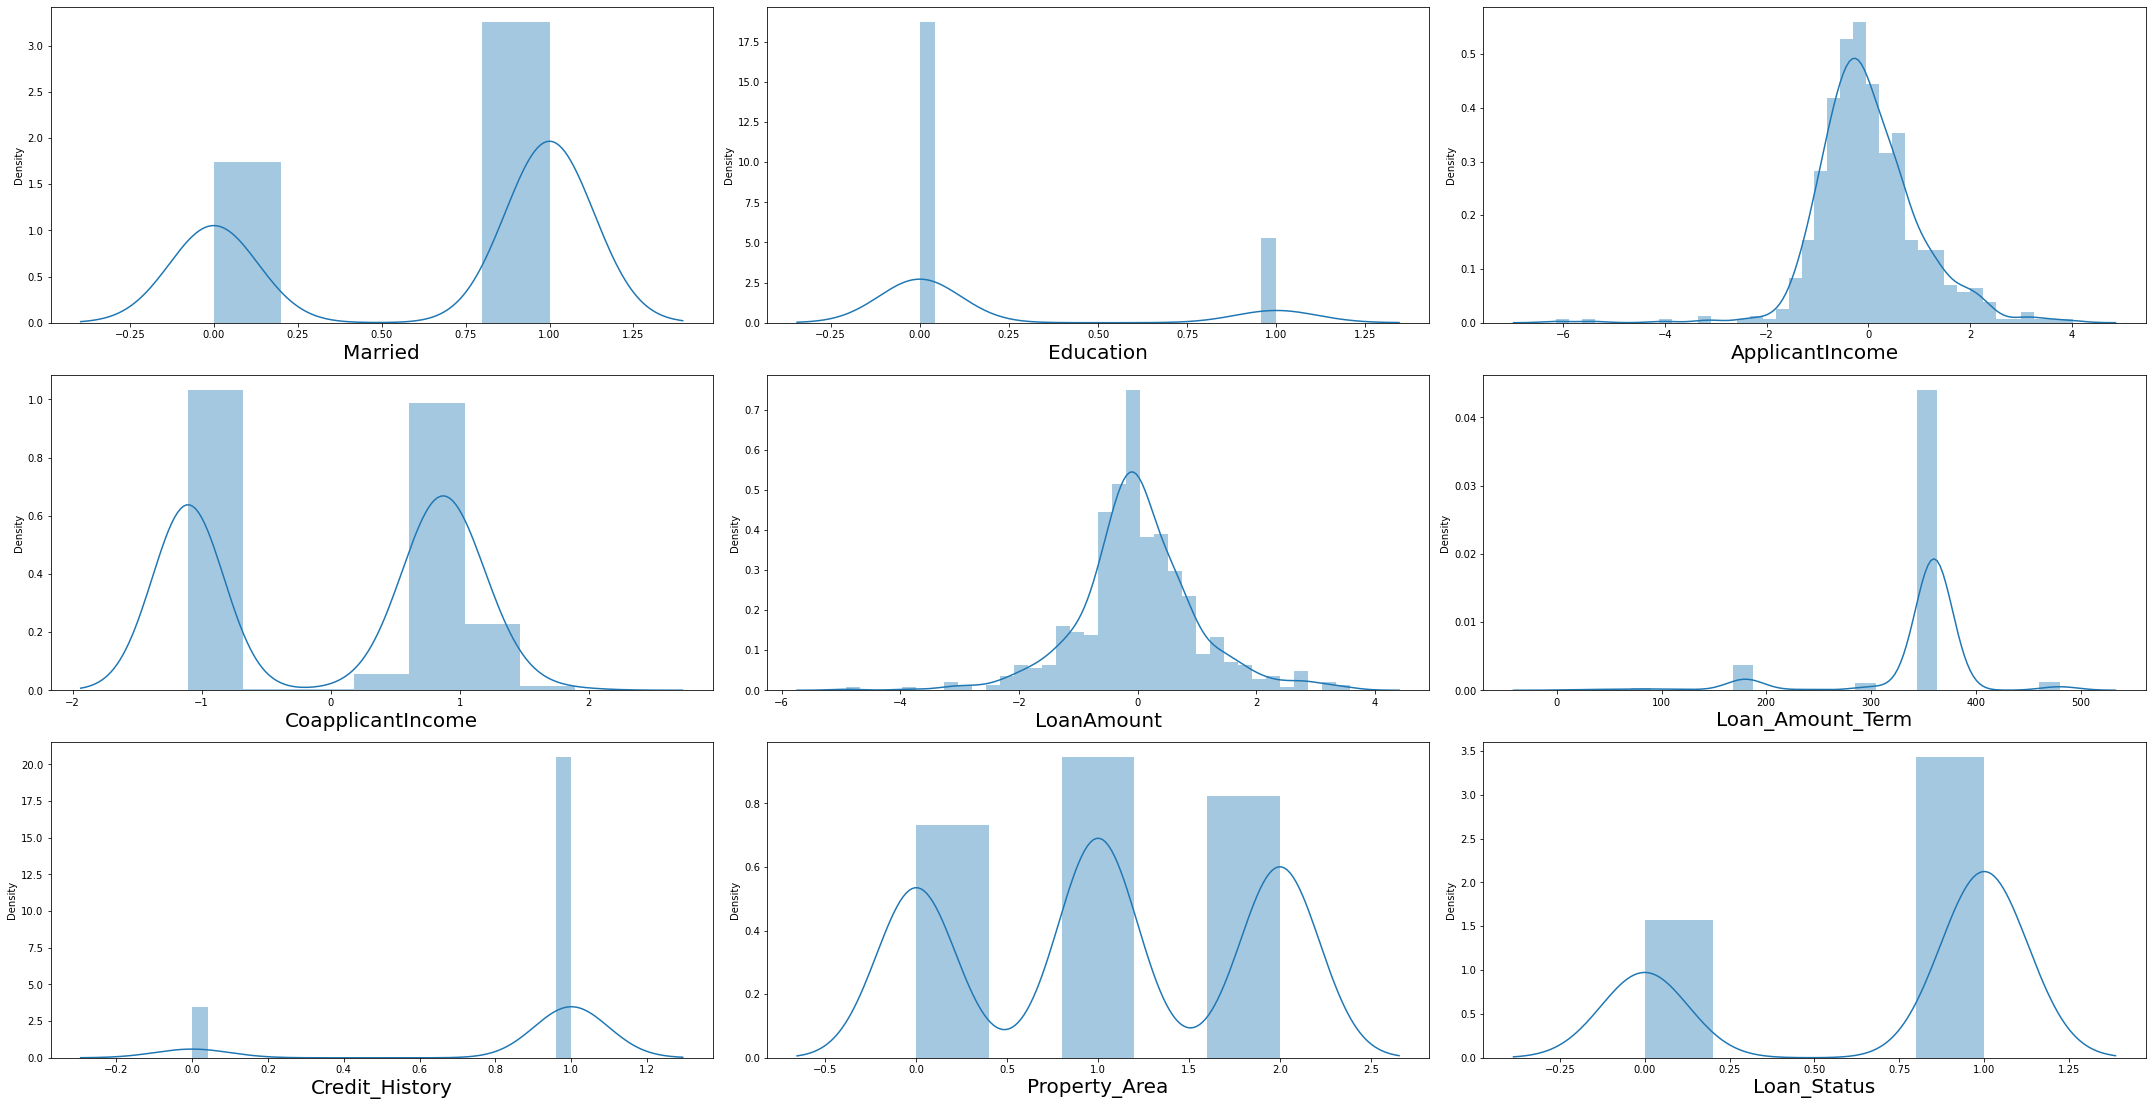

In [124]:
# checking outliers
# let's check the distribution of data
plt.figure(figsize = (30,20))
plotnumber = 1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

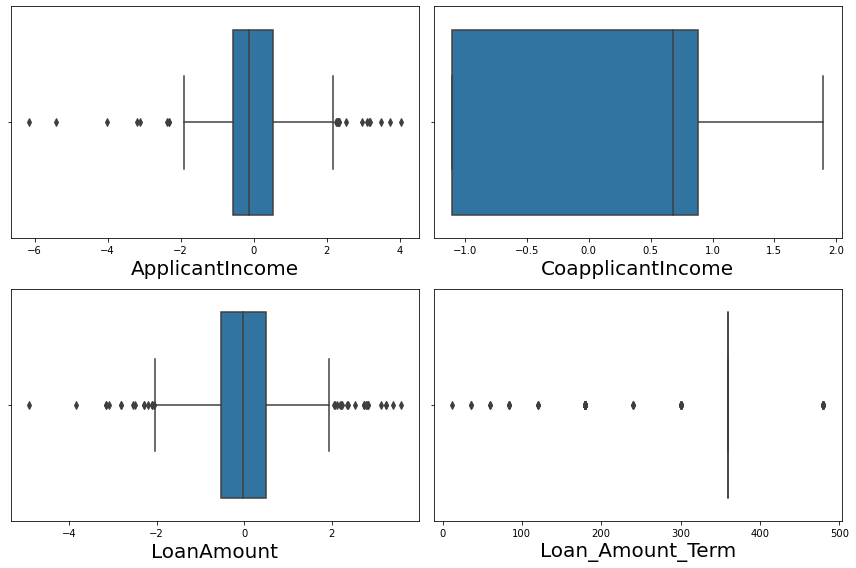

In [125]:
# checking outliers
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [126]:
# removing outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (611, 9)
Shape of the dataframe after removing outliers:  (583, 9)
Percentage of data loss post outlier removal:  4.582651391162029


In [127]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


- outliers and skewness is removed


let's balance the data

In [128]:
from imblearn.over_sampling import SMOTE

# Splitting data in target and dependent feature
x = df.drop(['Loan_Status'], axis =1)
y = df['Loan_Status']

# Oversampleing using SMOTE Techniques
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
y.value_counts()

1    399
0    399
Name: Loan_Status, dtype: int64

In [130]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled = scaler.fit_transform(x)

### Model Building

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [133]:
# searching for best random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8083333333333333 on Random_state 245


#### Logistic Regression model

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=245, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8083333333333333


Confusion matrix of Logistics Regression : 
 [[ 78  40]
 [  6 116]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.93      0.66      0.77       118
           1       0.74      0.95      0.83       122

    accuracy                           0.81       240
   macro avg       0.84      0.81      0.80       240
weighted avg       0.83      0.81      0.80       240



In [137]:
# Finding Optimal value of n_neighbors for KNN
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(x_train,y_train)  #fit the model
    y_pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4654746681256314
RMSE value for k=  2 is: 0.5041494487418058
RMSE value for k=  3 is: 0.47871355387816905
RMSE value for k=  4 is: 0.51234753829798
RMSE value for k=  5 is: 0.4958158260214505
RMSE value for k=  6 is: 0.5204164998665332
RMSE value for k=  7 is: 0.5204164998665332
RMSE value for k=  8 is: 0.5163977794943222
RMSE value for k=  9 is: 0.5082650227325636
RMSE value for k=  10 is: 0.5244044240850758
RMSE value for k=  11 is: 0.5204164998665332
RMSE value for k=  12 is: 0.5204164998665332
RMSE value for k=  13 is: 0.5041494487418058
RMSE value for k=  14 is: 0.5163977794943222
RMSE value for k=  15 is: 0.4958158260214505
RMSE value for k=  16 is: 0.5082650227325636
RMSE value for k=  17 is: 0.48304589153964794
RMSE value for k=  18 is: 0.4958158260214505
RMSE value for k=  19 is: 0.48733971724044817
RMSE value for k=  20 is: 0.4958158260214505
RMSE value for k=  21 is: 0.4915960401250875
RMSE value for k=  22 is: 0.5
RMSE value for k=  23 is: 0.5
RMS

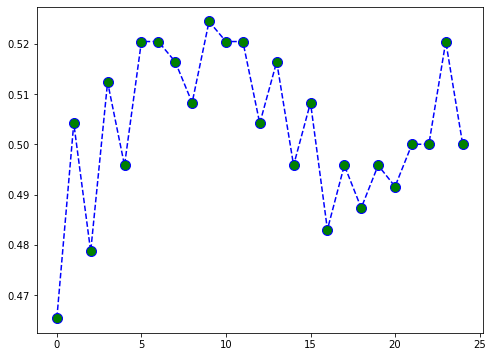

In [139]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

- At k=1, we get the minimum RMSE value which approximately 0.4654746681256314, and shoots up on further increasing the k value. We can safely say that k=1 will give us the best result in this case

#### Applying other classification Models


Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7791666666666667


Confusion matrix : 
 [[ 80  38]
 [ 15 107]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.68      0.75       118
           1       0.74      0.88      0.80       122

    accuracy                           0.78       240
   macro avg       0.79      0.78      0.78       240
weighted avg       0.79      0.78      0.78       240





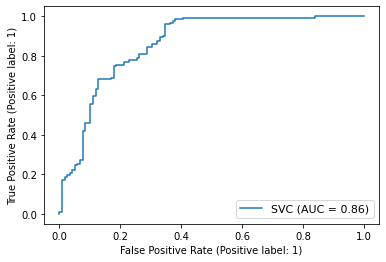

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7916666666666666


Confusion matrix : 
 [[ 71  47]
 [  3 119]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.60      0.74       118
           1       0.72      0.98      0.83       122

    accuracy                           0.79       240
   macro avg       0.84      0.79      0.78       240
weighted avg       0.84      0.79      0.78       240





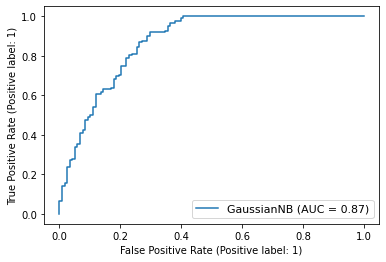

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7833333333333333


Confusion matrix : 
 [[98 20]
 [32 90]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       118
           1       0.82      0.74      0.78       122

    accuracy                           0.78       240
   macro avg       0.79      0.78      0.78       240
weighted avg       0.79      0.78      0.78       240





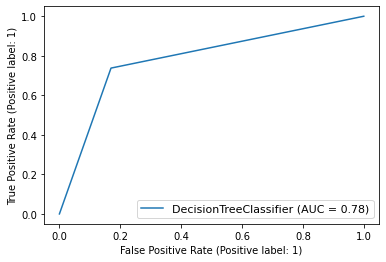

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=1) is


Accuracy Score :
 0.7833333333333333


Confusion matrix : 
 [[96 22]
 [30 92]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       118
           1       0.81      0.75      0.78       122

    accuracy                           0.78       240
   macro avg       0.78      0.78      0.78       240
weighted avg       0.78      0.78      0.78       240





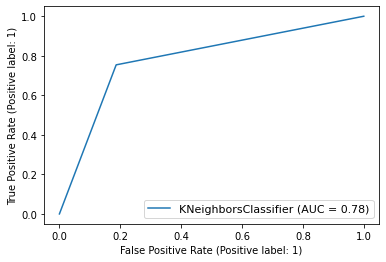

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8541666666666666


Confusion matrix : 
 [[ 98  20]
 [ 15 107]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       118
           1       0.84      0.88      0.86       122

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240





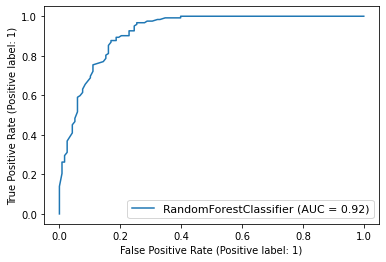

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8125


Confusion matrix : 
 [[97 21]
 [24 98]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       118
           1       0.82      0.80      0.81       122

    accuracy                           0.81       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.81      0.81      0.81       240





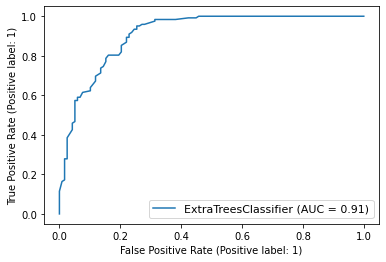

In [140]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 1),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,x_test,y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')

#### Cross validation of models

In [142]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 1),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, x_scaled, y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.68125    0.74375    0.78125    0.74213836 0.77358491]
Mean Score : 0.7443946540880503
Std deviation : 0.0352225526314609




Cross Validation Score SVC() :

Score : [0.69375    0.7375     0.78125    0.76100629 0.81132075]
Mean Score : 0.7569654088050315
Std deviation : 0.039838834732681114




Cross Validation Score GaussianNB() :

Score : [0.69375    0.6875     0.76875    0.7672956  0.81132075]
Mean Score : 0.7457232704402517
Std deviation : 0.04772796993956933




Cross Validation Score DecisionTreeClassifier() :

Score : [0.725      0.76875    0.775      0.71698113 0.79245283]
Mean Score : 0.7556367924528301
Std deviation : 0.029445487886142672




Cross Validation Score KNeighborsClassifier(n_neighbors=1) :

Score : [0.76875    0.7375     0.83125    0.8427673  0.86163522]
Mean Score : 0.8083805031446542
Std deviation : 0.04719354355817949




Cross Validation Score RandomForestClassifier() :

Score : [0.7375     0.74375   

- models are not overfitting

#### Hyper parameter tuning


In [143]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.696 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.616 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.714 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.766 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [144]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 50}

In [160]:
# training final model tuned parameter
Final = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators=48, max_depth=98 ,max_features='auto')
Final.fit(x_train,y_train)
y_pred=Final.predict(x_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.8583333333333333


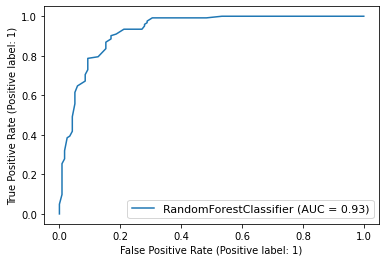

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8578771881078078


In [162]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, Final.predict(x_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

accuracy is increased by 1 percentage

In [163]:
# saving the model
import pickle
filename = 'Loan_Status'
pickle.dump(Final, open(filename,'wb'))